In [2]:
import numpy as np 
import pandas as pd  
import re 
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
df = pd.read_csv('aft_fe.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [5]:
df.shape

(3803, 23)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [6]:
df.duplicated().sum()

126

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


# property type

<Axes: xlabel='property_type'>

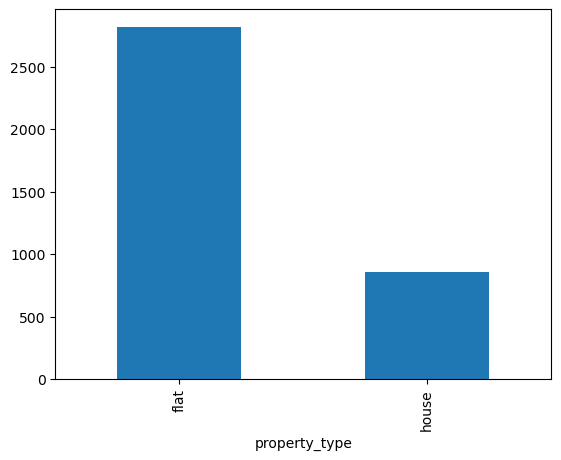

In [9]:
df['property_type'].value_counts().plot(kind = 'bar')

In [10]:
#observations 
# flats are majority that is nearly 75%

In [11]:
df['society'].value_counts().shape

(676,)

In [12]:
df['society'].value_counts()

society
independent                               486
tulip violet                               75
ss the leaf                                73
dlf new town heights                       42
shapoorji pallonji joyville gurugram       42
                                         ... 
dlf gardencity enclave                      1
nitin vihar                                 1
landmark the residency                      1
kw royal court                              1
surendra homes dayaindependentd colony      1
Name: count, Length: 676, dtype: int64

In [13]:
df[df['society']!= 'independent']['society'].value_counts(normalize = True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
ramsons kshitij                         0.490282
umang monsoon breeze                    0.494357
ats kocoon                              0.498433
ireo the corridors                      0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [14]:
society_counts = df['society'].value_counts() 

# frequency distribution for societies 
frequency_bins = {
    "Very High (>100)": (society_counts>100).sum(),
    "High (50-100)": ((society_counts>=50) & (society_counts<=100)).sum(), 
    "Average (10-49)":((society_counts>=10) & (society_counts<50)).sum() , 
    "Low (2-9)":((society_counts>1) & (society_counts<10)).sum(), 
    "Very Low (1)":(society_counts==1).sum()
} 
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

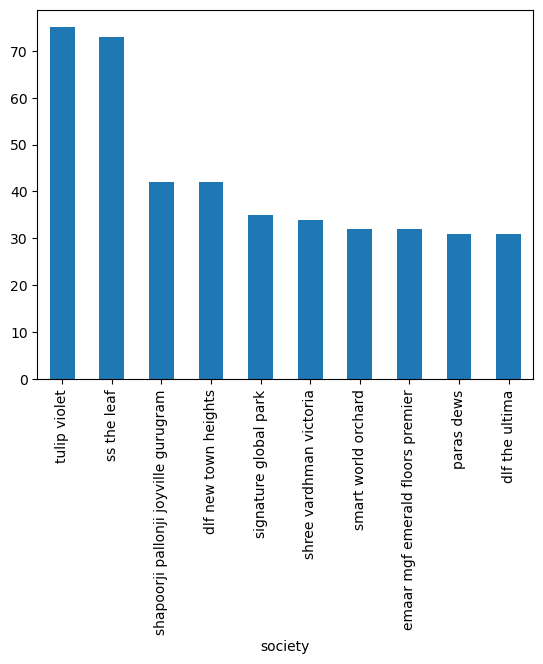

In [15]:
# top 10 society 
df[df['society']!='independent']['society'].value_counts().head(10).plot(kind = 'bar')

In [16]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


# SECTOR 

In [17]:
df['sector'].value_counts().shape

(104,)

In [18]:
#PRICE 


In [19]:
df['price'].isnull().sum()

17

In [20]:
df['price'].describe()

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

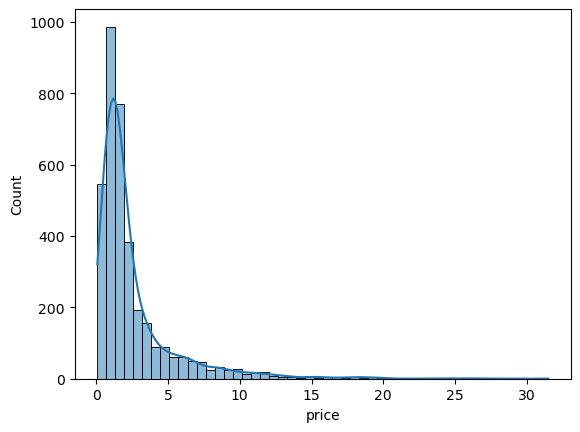

In [21]:
sns.histplot(df['price'] , kde = True , bins = 50)

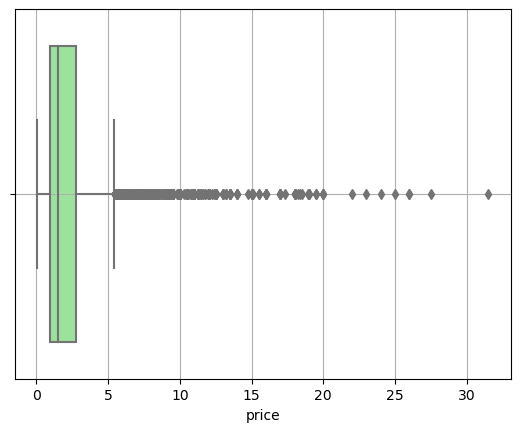

In [22]:
sns.boxplot(x = df['price'] , color = 'lightgreen') 
plt.grid()

In [23]:
skewness = df['price'].skew() 
kurtosis =  df['price'].kurt() 
print(skewness , kurtosis)

3.2791704733134623 14.933372629214258


In [24]:
# quantile analysis 
quantiles = df['price'].quantile([0.01 , 0.05 , 0.95 , 0.99]) 
quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

In [25]:
# identify potential outliers using iqr method 
q1 = df['price'].describe()['25%'] 
q3 = df['price'].describe()['75%'] 
iqr = q3-q1 
iqr

1.8

In [26]:
lower_bound = q1 - 1.5*iqr 
upper_bound = q3 + 1.5*iqr  
print(lower_bound , upper_bound)

-1.7500000000000002 5.45


In [27]:
outliers = df[(df['price']<lower_bound) | (df['price']>upper_bound)] 
outliers.shape

(425, 23)

In [28]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

<Axes: xlabel='price'>

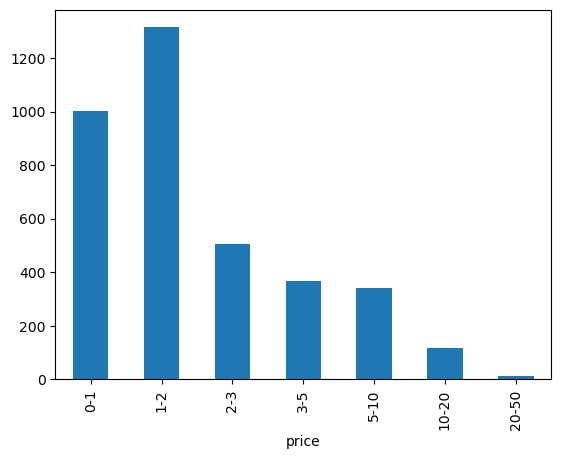

In [29]:
bins = [0, 1, 2, 3, 5, 10, 20, 50] 
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"] 

# Use pd.cut to categorize the 'price' column into bins
binned_prices = pd.cut(df['price'], bins=bins, labels=bin_labels, right=False)

# Calculate value counts for each bin and plot as a bar chart
binned_prices.value_counts().sort_index().plot(kind='bar')

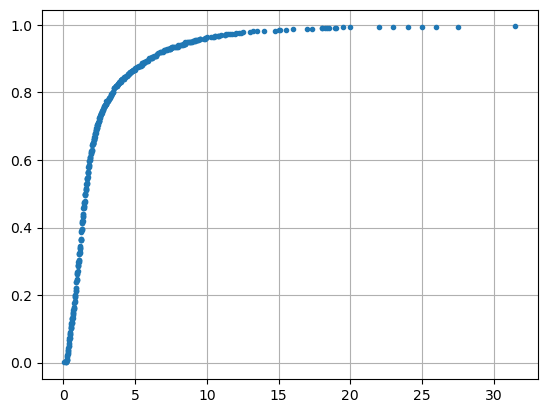

In [30]:
#ecdf plot 
ecdf = df['price'].value_counts().sort_index().cumsum()/len(df['price']) 
plt.plot(ecdf.index , ecdf , marker = '.' , linestyle = 'none') 
plt.grid()

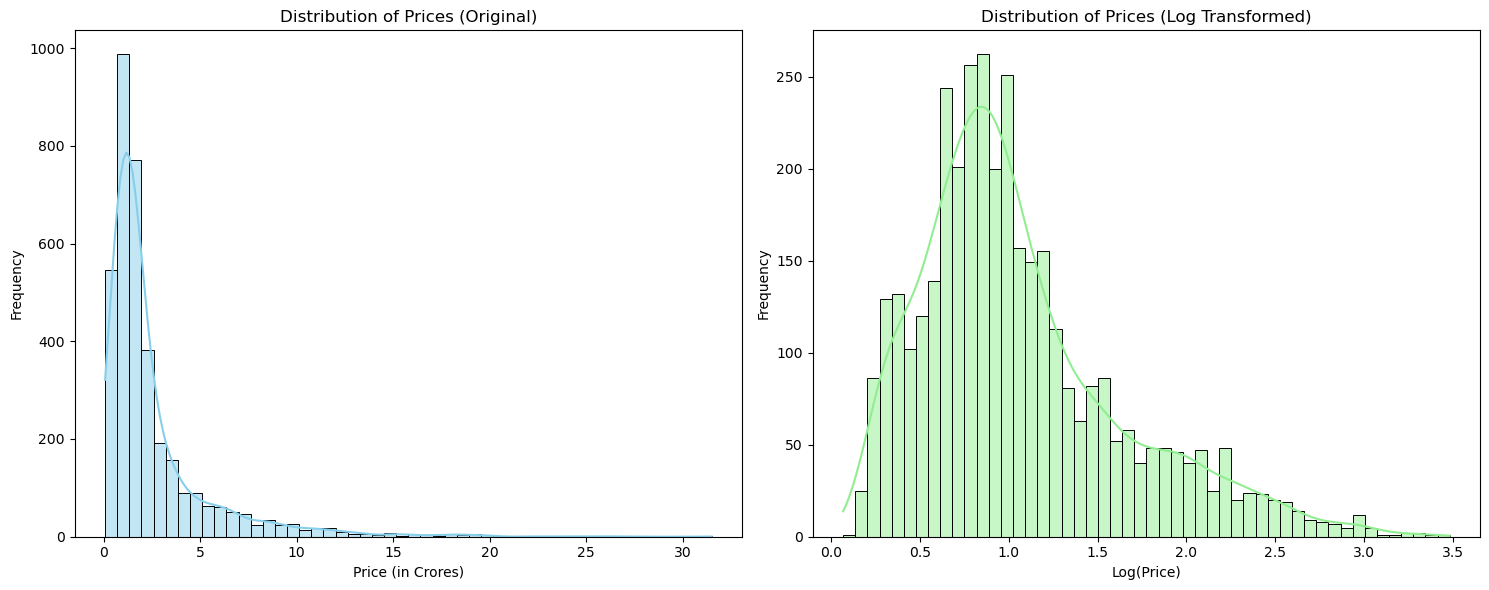

In [31]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [32]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449296


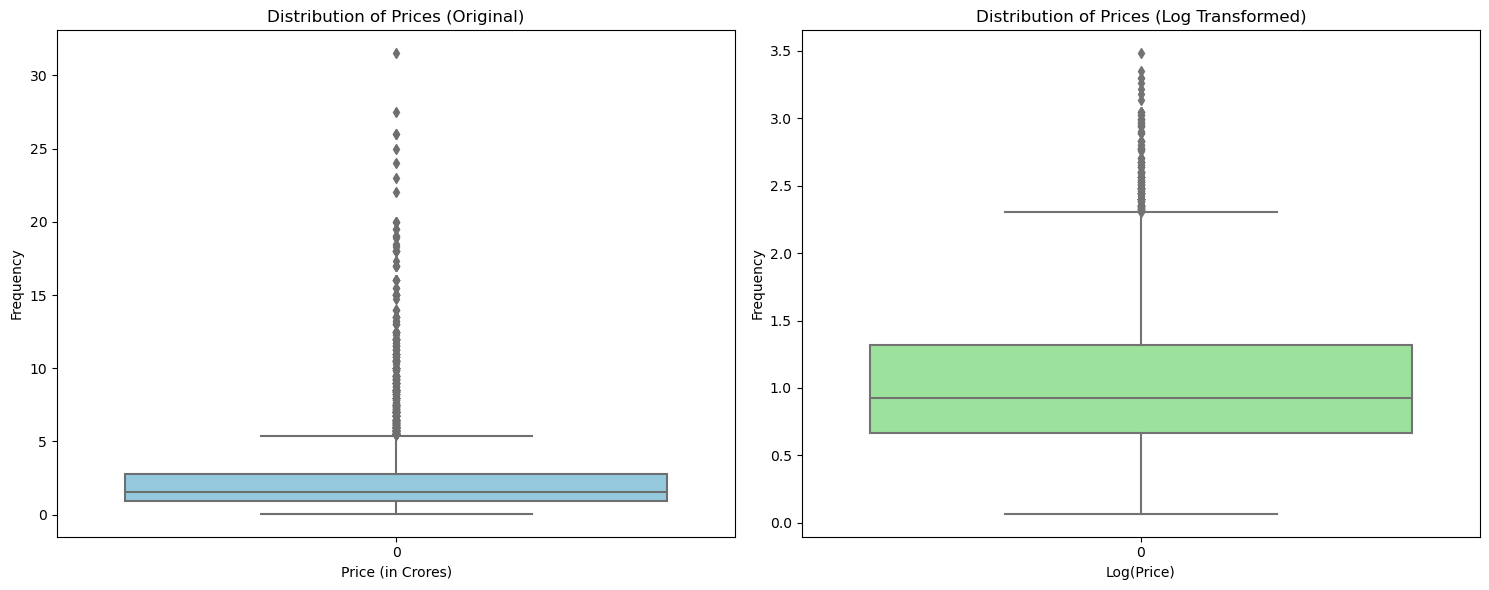

In [33]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Price per sq feet

In [34]:
df['price_per_sqft'].isnull().sum()

17

<Axes: xlabel='price_per_sqft', ylabel='Count'>

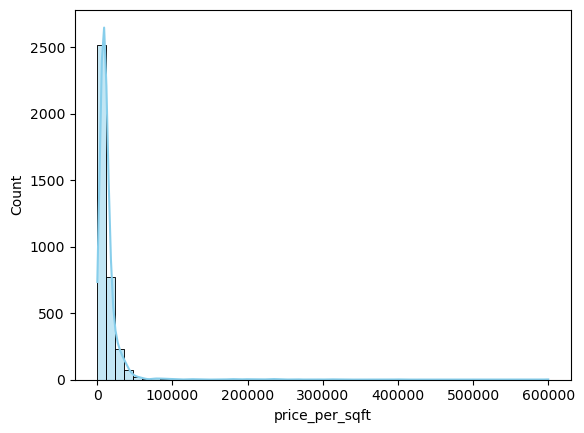

In [35]:
sns.histplot(df['price_per_sqft'] , bins = 50 , color = 'skyblue' , kde = True)

<Axes: >

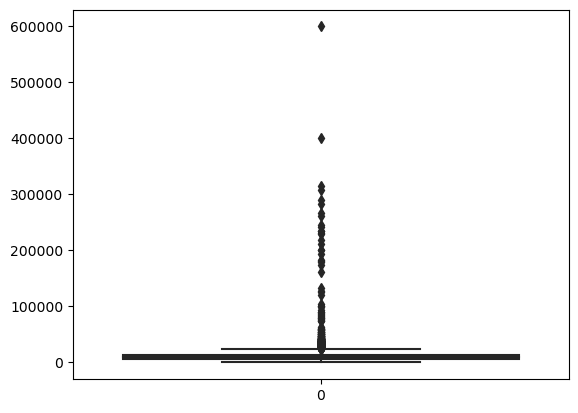

In [36]:
sns.boxplot(df['price_per_sqft'] , color = 'green')

# bedroom

In [37]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

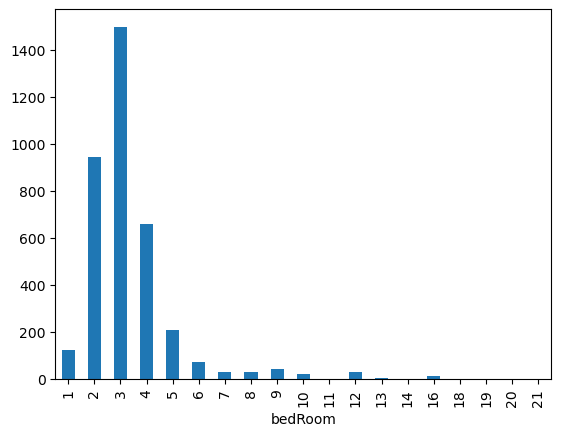

In [38]:
df['bedRoom'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='proportion'>

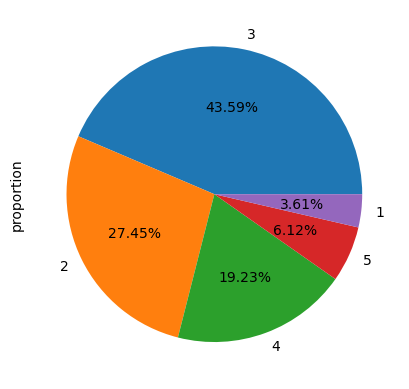

In [39]:
df['bedRoom'].value_counts(normalize = True).head().plot(kind = 'pie' , autopct = '%0.2f%%')

<Axes: xlabel='bedRoom'>

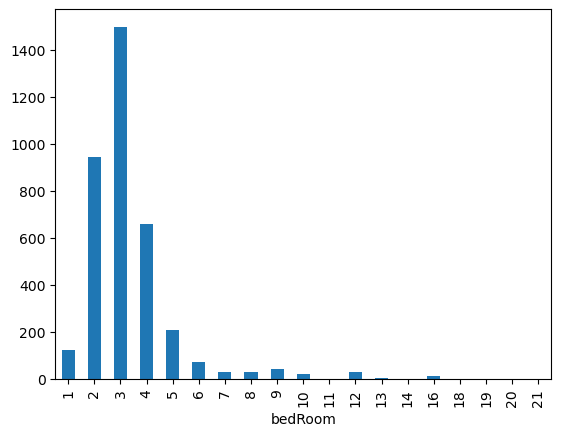

In [40]:
df['bedRoom'].value_counts().sort_index().plot(kind = 'bar')

# bathroom

In [41]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

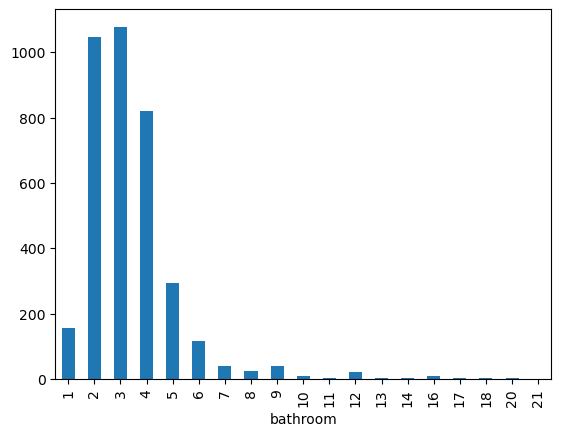

In [42]:
df['bathroom'].value_counts().sort_index().plot(kind = 'bar')

<Axes: ylabel='proportion'>

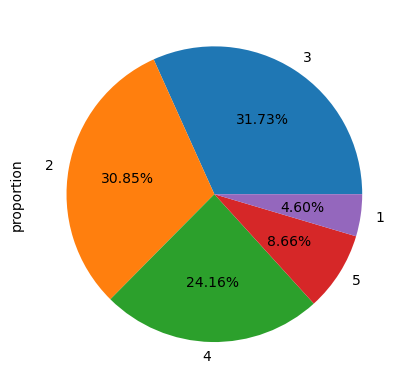

In [43]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')


In [44]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


# balcony

In [45]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

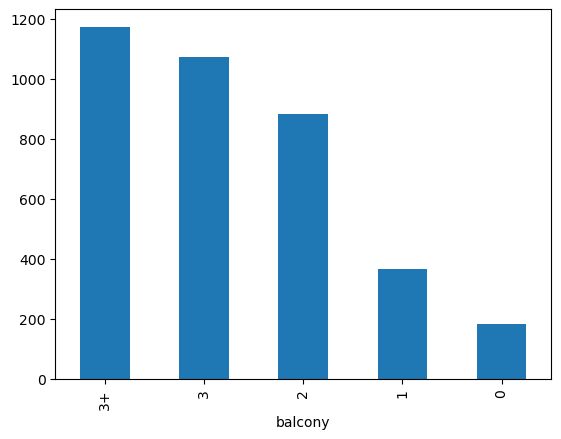

In [46]:
df['balcony'].value_counts().plot(kind = 'bar')

<Axes: ylabel='proportion'>

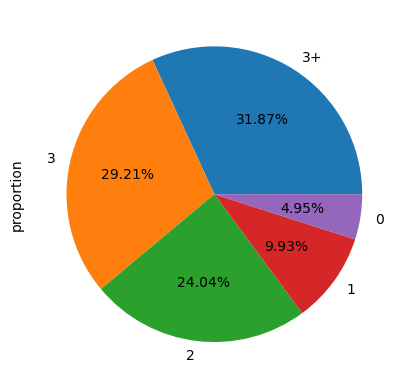

In [47]:
df['balcony'].value_counts(normalize=True).head().plot(kind = 'pie',autopct='%0.2f%%')

In [48]:
#floornum 

In [49]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [50]:
df['floorNum'].isnull().sum()

19

In [51]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

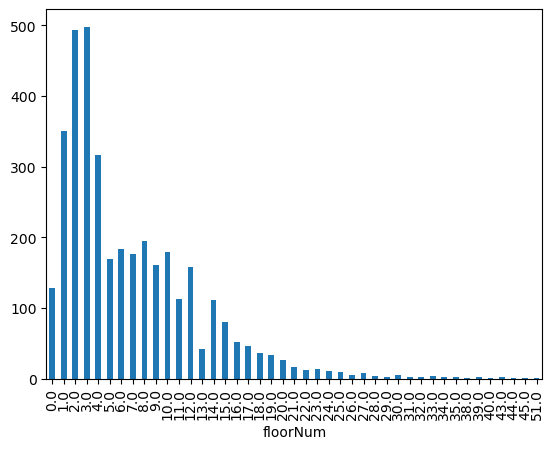

In [52]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: >

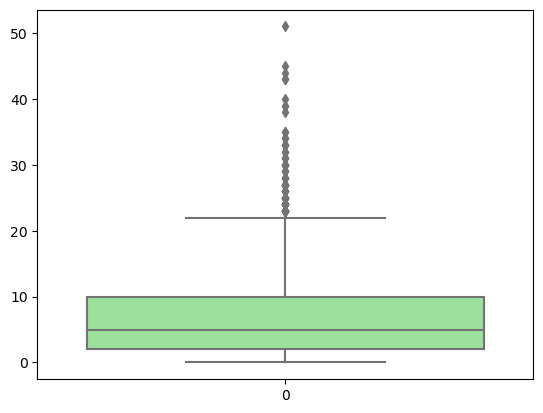

In [53]:
sns.boxplot(df['floorNum'], color='lightgreen')

# facing

In [54]:
df['facing'].isnull().sum()

1045

In [55]:
df['facing'].fillna('NA',inplace=True)

In [56]:
df['facing'].value_counts()

facing
NA            1045
North-East     623
East           623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

# age possession 

In [57]:
df['agePossession'].isnull().sum()

0

In [58]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

# areas 

In [59]:
#super builtup are 
df['super_built_up_area'].isnull().sum()

1802

In [60]:
df['super_built_up_area'].describe()


count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

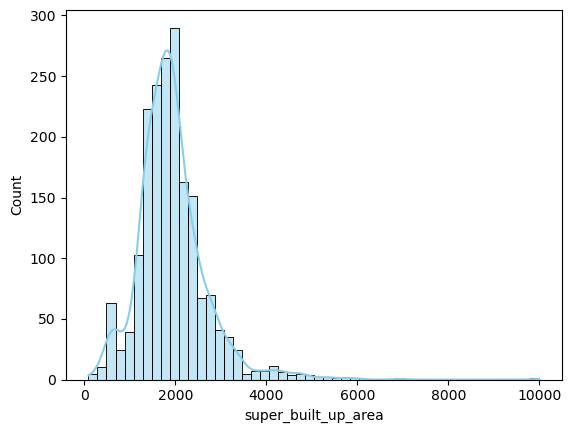

In [61]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)


<Axes: >

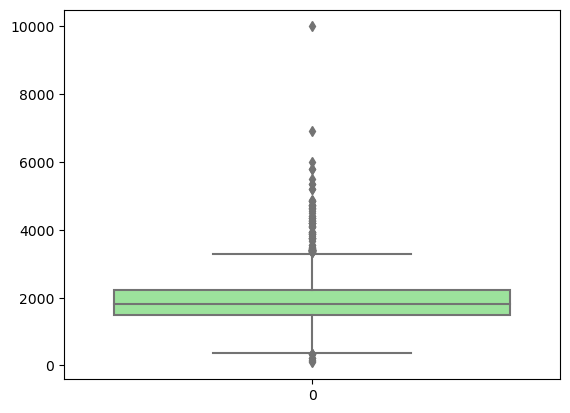

In [62]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')


In [63]:
#built up area 
df['built_up_area'].isnull().sum()


1987

In [64]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

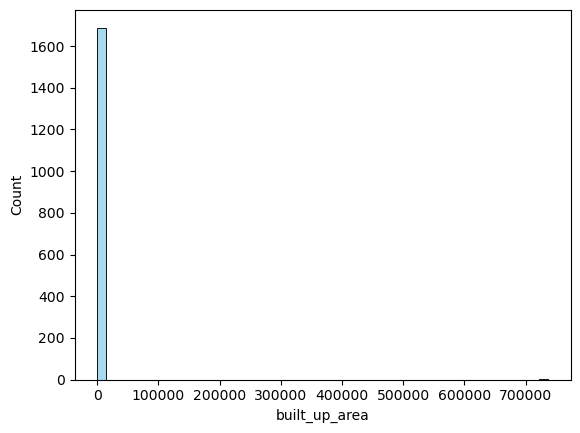

In [65]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)
